In [36]:
import pandas as pd
import numpy as np

from random import randint

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

from os.path import join
from PIL import Image

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [44]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print("GPU Devices: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)
# For some reason Tensor is not finding my GPU

In [65]:

train_labels = []
train_samples = []

for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [66]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
#Shuffle to get rid of any imposed order from generation
train_labels,train_samples = shuffle(train_labels,train_samples)


In [45]:
# Normalize data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
# just a formality, the fit transform funciton does not accept 1D data by default
# beacause our data is 1D we need to reshape it to fit the transform funciton
scaled_trained_samples = scaler.fit_transform(train_samples.reshape(-1,1))
scaled_trained_samples.shape


(2100, 1)

In [59]:
model = Sequential([
    # (1,) means a 2d grid, (28,28) could be a grayscale image
    # First hidden layer how the model knows what input data shape is
    # Units are the number of Neuron connections, this is arbitrary, but usually complex data needs more neurons
    #Dense just means every neuron conects to each other

    
    Input(shape=(1,)),
    # Dense(units=16, input_shape=(1,), activation="relu"), 
    # got a warning for the code right above, apparently models prefer you pass the input shape explicitly like so.
    
    #Relu is Rectified Linear Unit
    Dense(units=16, activation="relu"),
    #positive numbers remain unchained but negative numbers become zero. Introduces nonlinearity. Less prone to the vanishing gadient problem
    Dense(units=32, activation="relu"), # hidden layer
    #softmax converts scors into probabilities. Each output becomes probability between 0 and 1, all the probabilities sum to 1
    Dense(units=2, activation="softmax") # output layer, 2 units correspond to 2 output classes
])

#This just creates the model, it is not trained yet.

In [60]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

In [125]:
# Prepares the Model
# Adam is an optimizer
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['Accuracy'])


In [126]:
#fit funciton, x and y need to be the same type of arrays, ideally numpy
#batch is how many samples are included in 1 batch, epochs mean that the process trains on all of the data 30 times.
#Shuffle is defualt set to True, so no order exists. Verbose- output 1 is less verbose, 0 is none.
model.fit(x=scaled_trained_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)
#Validaiton split automatically splits out a training set. the validaiton no longer contains training data
# the reason we shuffle the training data before, is because the split occurs before the shuffle does on model.fit, and the validaiton may never be shuffled


Epoch 1/30
189/189 - 1s - 6ms/step - Accuracy: 0.9444 - loss: 0.2588 - val_Accuracy: 0.9381 - val_loss: 0.2773
Epoch 2/30
189/189 - 0s - 2ms/step - Accuracy: 0.9439 - loss: 0.2576 - val_Accuracy: 0.9381 - val_loss: 0.2765
Epoch 3/30
189/189 - 0s - 2ms/step - Accuracy: 0.9439 - loss: 0.2565 - val_Accuracy: 0.9381 - val_loss: 0.2757
Epoch 4/30
189/189 - 0s - 2ms/step - Accuracy: 0.9418 - loss: 0.2557 - val_Accuracy: 0.9381 - val_loss: 0.2750
Epoch 5/30
189/189 - 0s - 2ms/step - Accuracy: 0.9450 - loss: 0.2548 - val_Accuracy: 0.9381 - val_loss: 0.2743
Epoch 6/30
189/189 - 0s - 2ms/step - Accuracy: 0.9434 - loss: 0.2540 - val_Accuracy: 0.9381 - val_loss: 0.2737
Epoch 7/30
189/189 - 0s - 2ms/step - Accuracy: 0.9444 - loss: 0.2532 - val_Accuracy: 0.9381 - val_loss: 0.2732
Epoch 8/30
189/189 - 0s - 2ms/step - Accuracy: 0.9444 - loss: 0.2526 - val_Accuracy: 0.9381 - val_loss: 0.2727
Epoch 9/30
189/189 - 0s - 2ms/step - Accuracy: 0.9444 - loss: 0.2519 - val_Accuracy: 0.9381 - val_loss: 0.2723
E

In [138]:
#using a validation set lest us see how well teh model is doing on data not included in the treaining set.
#overfitting is when the model has learned the training data really well, but does not work well on real data
# How to spot overfitting by deeplizard
#If validation accuracy is falling behind training accuracy, it means we have an overfitting problem
model.optimizer

In [127]:
# Using test data helps validate our model against data it has not seen before. you should prepare your 
# test data the same way you would prepare your training data. we are using the same code at 20% of data
test_labels = []
test_samples = []

for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
#Shuffle to get rid of any imposed order from generation
test_labels,test_samples = shuffle(test_labels,test_samples)
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [128]:
# Predict on model
predictions = model.predict(x=scaled_test_samples, batch_size=10,verbose=0)

In [129]:
for i in predictions:
    print(i)

[0.9671846  0.03281541]
[0.28817979 0.7118202 ]
[0.9656165  0.03438355]
[0.96652114 0.03347882]
[0.9671846  0.03281541]
[0.96457326 0.03542675]
[0.0069711  0.99302894]
[0.17890157 0.8210984 ]
[0.9208995  0.07910051]
[0.08208049 0.9179196 ]
[0.01681734 0.98318267]
[0.00790944 0.9920906 ]
[0.96175635 0.03824371]
[0.01154293 0.988457  ]
[0.02158517 0.97841483]
[0.00897293 0.99102706]
[0.07299027 0.9270097 ]
[0.07299027 0.9270097 ]
[0.9671846  0.03281541]
[0.04519361 0.9548064 ]
[0.02444222 0.9755578 ]
[0.95544803 0.04455205]
[0.01483803 0.98516196]
[0.01483803 0.98516196]
[0.0069711  0.99302894]
[0.9622607  0.03773932]
[0.01483803 0.98516196]
[0.9660718  0.03392828]
[0.96629715 0.03370283]
[0.00790944 0.9920906 ]
[0.96175635 0.03824371]
[0.11580988 0.88419014]
[0.2089796  0.79102033]
[0.96629715 0.03370283]
[0.96538657 0.03461339]
[0.96188164 0.03811844]
[0.80898297 0.19101709]
[0.9376545 0.0623455]
[0.00614339 0.9938566 ]
[0.9660718  0.03392828]
[0.95319384 0.04680622]
[0.9627587  0.0372

In [130]:
# get indec os prediciton with highest probability.
rounded_predictions = np.argmax(predictions, axis=1)

In [131]:
for i in rounded_predictions:
    print(i)

0
1
0
0
0
0
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
0
1
0
0
1
0
1
1
0
0
0
0
0
1
0
0
0
1
1
1
1
1
1
0
1
0
1
1
0
1
0
1
1
1
0
0
0
1
0
1
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
0
1
1
0
0
1
0
0
0
1
1
0
1
1
0
1
1
1
1
0
1
0
0
1
1
1
0
0
1
0
0
1
0
0
1
1
0
0
0
1
1
1
0
0
1
1
0
1
0
1
0
1
0
1
0
0
1
0
0
1
1
1
0
0
0
1
1
0
0
0
1
1
1
0
0
1
1
0
0
0
0
1
0
0
0
1
1
0
1
0
0
0
0
0
0
1
0
0
1
0
1
1
0
1
1
0
0
0
1
0
1
0
1
0
1
1
0
1
1
1
0
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
0
1
1
1
1
0
1
0
1
0
0
0
1
1
0
0
0
1
1
1
1
1
1
1
1
1
0
1
0
0
1
0
0
0
1
1
1
0
1
1
0
0
0
1
0
0
0
1
1
1
1
1
1
0
1
0
0
1
0
1
1
1
0
0
0
1
1
0
1
0
1
1
1
0
1
0
0
0
0
1
1
1
1
1
0
0
0
0
1
1
0
1
1
0
1
1
1
0
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
0
1
0
1
0
0
1
1
0
1
0
1
0
0
1
1
0
0
0
0
1
0
0
1
0
1
0
1
0
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
0
1
1
0
0
0
1
1
0
1
0
0
1
0
1
0
1
0
1
1
1
0
0
1
0
1
0


# Confusion matrix to visualize the results

In [132]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [133]:
# test labels are labeled against true labels
# Rounded predictions is from above.
cm = confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)

In [134]:

# this function is apparently taken from scikitlearn's website, though it says its depreciated
# From website:
"""
Deprecated since version 1.0: plot_confusion_matrix is deprecated in 1.0 and will be removed in 1.2. 
Use one of the following class methods: from_predictions or from_estimator.
"""
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'
    """

    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[: ,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion matrix without normalization")

    print(cm)

    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

    

Confusion matrix without normalization
[[194  16]
 [ 10 200]]


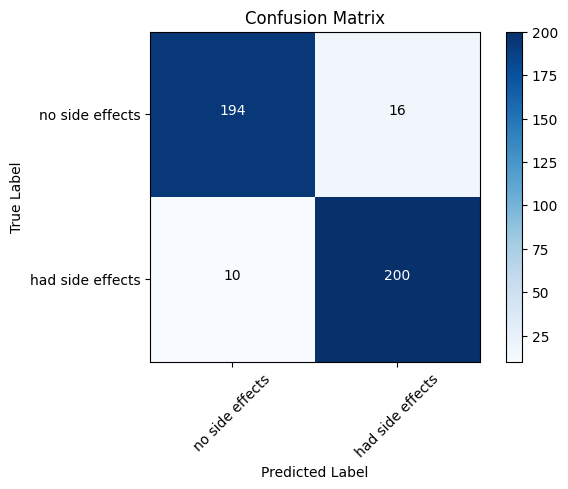

In [135]:
cm_plot_labels = ["no side effects","had side effects"]
plot_confusion_matrix(cm=cm,classes=cm_plot_labels, title="Confusion Matrix", normalize=False)

# the blue part of the confusion matrix is the accuracy.

# Saving and loading a Keras model.

In [144]:
import os.path
model_path = join("models","medical_trail_model.keras")
if os.path.isfile(model_path) is False:
    model.save(model_path)



In [140]:
from tensorflow.keras.models import load_model
new_model = load_model(model_path)

In [141]:
new_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,928 (7.54 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,286 (5.03 KB)

In [142]:
new_model.get_weights()

[array([[ 0.42002907,  0.6830432 ,  0.65568817,  0.25540507, -0.55736536,
          0.54222184, -0.12944242,  0.44443947,  0.20991388,  0.30434594,
          0.25528347, -0.18003091, -0.09529573, -0.19966274, -0.3835436 ,
          0.28780413]], dtype=float32),
 array([-0.15047953, -0.18499216, -0.1800901 , -0.09630053,  0.        ,
        -0.14785105,  0.        , -0.12434486, -0.09503821, -0.12853272,
         0.20611109,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.12132689], dtype=float32),
 array([[-3.68176877e-01, -1.36080295e-01,  4.06287074e-01,
         -2.43157744e-02,  2.57831246e-01, -1.77376196e-01,
          1.96019575e-01, -1.79978564e-01, -4.58271086e-01,
         -2.57438838e-01,  4.43245471e-02,  2.67219156e-01,
          5.28471947e-01, -2.48334277e-02,  8.30679312e-02,
          7.22508691e-03, -1.52602792e-02, -6.42008483e-02,
          4.23726477e-02,  4.05989736e-01, -3.81776690e-03,
         -4.63008285e-01, -5.60594618e-01, -3.67386818e-01,
 

In [143]:
new_model.optimizer

In [145]:
json_string = model.to_json() # Only saves model architecture, though it seems like .keras gives more info than .h5

# yaml_string = model.to_yaml()

In [146]:
json_string

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential_3", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 1], "dtype": "float32", "sparse": false, "name": "input_layer_3"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense_9", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_constra

In [148]:
# Model reconstruction fromm json
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)




In [149]:
model_architecture.summary()




Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,928 (7.54 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,286 (5.03 KB)

# Save soley model weights only, not the ardchitecture or loss data

In [152]:
import os.path
model_weight_path = join("models","medical_trail_weights.weights.h5")
if os.path.isfile(model_weight_path) is False:
    model.save_weights(model_weight_path)


# Since tutorial apparenlty it must end with file.weights.h5

In [154]:
# load a similar model
model2 = Sequential([
    Input(shape=(1,)),
    Dense(units=16, activation="relu"),
    Dense(units=32, activation="relu"), 
    Dense(units=2, activation="softmax")
])

In [156]:
model2.load_weights(model_weight_path)

In [157]:
model2.get_weights()

[array([[ 0.42002907,  0.6830432 ,  0.65568817,  0.25540507, -0.55736536,
          0.54222184, -0.12944242,  0.44443947,  0.20991388,  0.30434594,
          0.25528347, -0.18003091, -0.09529573, -0.19966274, -0.3835436 ,
          0.28780413]], dtype=float32),
 array([-0.15047953, -0.18499216, -0.1800901 , -0.09630053,  0.        ,
        -0.14785105,  0.        , -0.12434486, -0.09503821, -0.12853272,
         0.20611109,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.12132689], dtype=float32),
 array([[-3.68176877e-01, -1.36080295e-01,  4.06287074e-01,
         -2.43157744e-02,  2.57831246e-01, -1.77376196e-01,
          1.96019575e-01, -1.79978564e-01, -4.58271086e-01,
         -2.57438838e-01,  4.43245471e-02,  2.67219156e-01,
          5.28471947e-01, -2.48334277e-02,  8.30679312e-02,
          7.22508691e-03, -1.52602792e-02, -6.42008483e-02,
          4.23726477e-02,  4.05989736e-01, -3.81776690e-03,
         -4.63008285e-01, -5.60594618e-01, -3.67386818e-01,
 